In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import h5py
from findiff import FinDiff
from numpy import log10 as log

In [2]:
f = h5py.File("out_M8_Re900.0.h5")
f.keys()

<KeysViewHDF5 ['BEk', 'UEk', 'sim_time']>

In [3]:
bk = f["BEk"][:]
uk = f["UEk"][:]
uk[uk==0.0] = np.nan
bk[bk==0.0] = np.nan

In [4]:
t = f["sim_time"][:]/(2*np.pi)
k = np.arange(1, 91)
kk, tt = np.meshgrid(k, t)

In [5]:
dt = t[1] - t[0]

Text(0.5, 0.98, '$U^2(t, k)$')

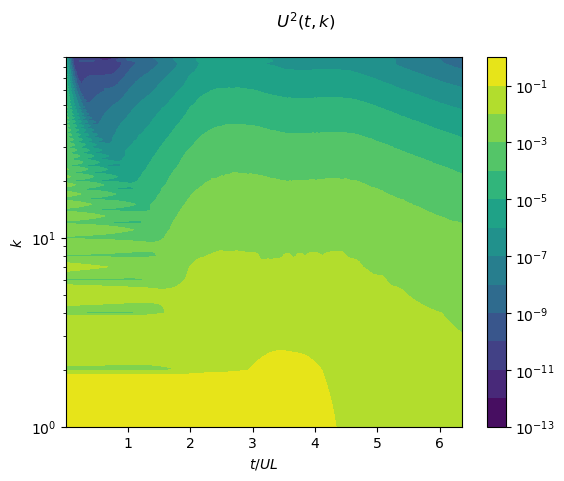

In [6]:
c = plt.contourf(tt, kk, uk, locator=ticker.LogLocator(numticks=40))
plt.yscale("log")
plt.colorbar(c)
plt.xlabel("$t/UL$")
plt.ylabel("$k$")
plt.suptitle("$U^2(t, k)$")

Text(0.5, 0.98, '$B^2(t, k)$')

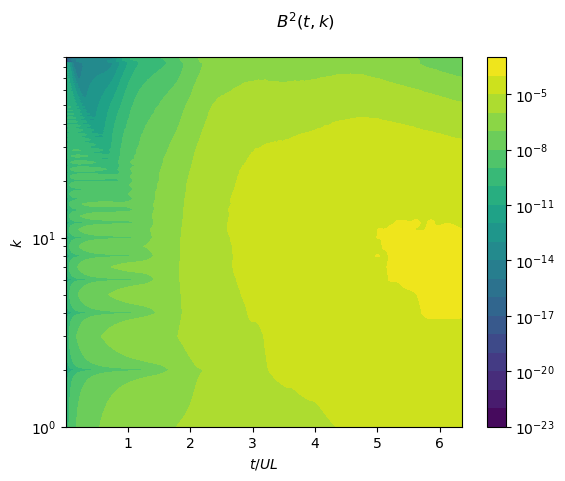

In [7]:
c = plt.contourf(tt, kk, bk, locator=ticker.LogLocator(numticks=40))
plt.yscale("log")
plt.colorbar(c)
plt.xlabel("$t/UL$")
plt.ylabel("$k$")
plt.suptitle("$B^2(t, k)$")

In [8]:
d_dt = FinDiff(0, dt)

In [9]:
dBk_dt = d_dt(np.log(bk))
dUk_dt = d_dt(np.log(uk))

Text(0.5, 0.98, '$\\gamma_U(t, k)$')

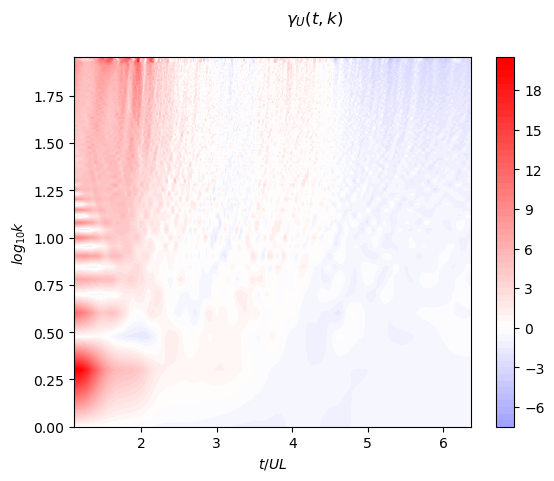

In [16]:
c = plt.contourf(tt[700:], log(kk[700:]), dUk_dt[700:], levels=60, cmap="bwr", vmin=-20, vmax=20)
# plt.xscale("log")
plt.colorbar(c)
plt.xlabel("$t/UL$")
plt.ylabel("$log_{10}k$")
plt.suptitle("$\gamma_U(t, k)$")

Text(0.5, 0.98, '$\\gamma_B(t, k)$')

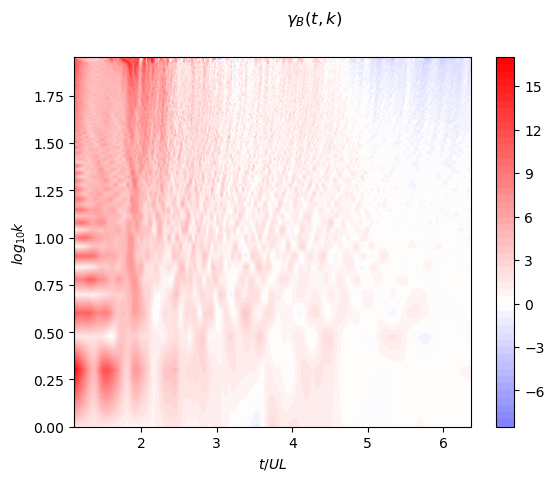

In [14]:
c = plt.contourf(tt[700:], log(kk[700:]), dBk_dt[700:], levels=60, cmap="bwr", vmin=-17, vmax=17)
plt.colorbar(c)
plt.xlabel("$t/UL$")
plt.ylabel("$log_{10}k$")
plt.suptitle("$\gamma_B(t, k)$")

In [12]:
dBk_dt.shape

(4000, 90)